# Introduction

During the Data Analytics phase, we execute a sequence of steps to construct and assess machine learning models to forecast optimal conditions based on sensor data. The process commences by importing the dataset, split into two phases: Setter and Hatcher. These sets are then merged and divided into training and test sets in preparation for model training. We employ Jupyter Notebook in Visual Studio Code for this workflow, allowing for interactive analysis and visualization of the data.

We have opted for Logistic Regression and Support Vector Machine (SVM) models for this analysis. Logistic Regression is chosen for its simplicity and efficiency in binary classification tasks, while SVM is selected for its effectiveness in managing complex datasets and identifying optimal decision boundaries. Both models are trained on the training dataset to predict whether the conditions are ideal or non-ideal.

Following model training, we predict the test dataset and assess their performance using accuracy, precision, recall, F1 score, and confusion matrix metrics. These assessments help us comprehend how effectively the models apply to unseen data. Subsequently, we employ the trained models to forecast environmental conditions based on actual sensor data. The results are stored in a CSV file for further analysis and reporting.

This strategy provides insights into our models' predictive accuracy and helps identify potential areas for improvement. Using Logistic Regression and SVM, we aim to achieve reliable predictions for ensuring optimal conditions in different scenarios. Below is an explanation of the analytical process.

# Install Packages

In [2]:
%pip install --upgrade pip
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install scikit-learn
#%pip install category_encoders
#%pip install xgboost

# %pip will install the package in the virtual environment
# !pip will install the package in the base environment

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Imports Libraries

In [92]:
# Computing
import numpy as np                                              # NumPy is fundamental for numerical computing in Python

# Dataset Handling
import pandas as pd                                             # Pandas is essential for data manipulation and analysis
#from pandas.api.types import CategoricalDtype                   # This is used to define a categorical data type in a DataFrame

# Models and Machine Learning
from sklearn.model_selection import train_test_split            # This function is used to split a dataset into training and testing sets
#from sklearn.model_selection import KFold                       # splits the data into K subsets to validate the model's performance
#from sklearn.model_selection import cross_val_score             # computes the cross-validated scores for a given estimator
#from xgboost import XGBRegressor                                # implementation of gradient boosted decision trees designed for speed and performance
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Plotting and Visualization
import matplotlib.pyplot as plt                                 # creating static, animated, and interactive visualizations
import seaborn as sns                                           # statistical data visualization library based on matplotlib
#from IPython.display import display                             # display objects in Jupyter notebooks

# Miscellaneous
import warnings                                                 # control the display of warning messages, allowing the user to ignore, display, or escalate
#from time import time, gmtime, strftime                         # Imports specific functions from the time module
import os                                                       # using operating system-dependent functionality 
from pathlib import Path                                        # object-oriented filesystem path manipulation library
from datetime import datetime     

# Configuration

In [93]:
# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")             #  uses Seaborn's theme with white grid background for all plots
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",     # Makes the axis labels bold
    labelsize="large",      # Sets the size of the axis labels to large
    titleweight="bold",     # Makes the axis titles bold.
    titlesize=14,           # Sets the size of the axis titles to 14
    titlepad=10,            # Adds padding of 10 points between the axis title and the plot
)

# Warnings Configuration
warnings.filterwarnings('ignore')                   # ignore all warning messages

# Directory Configuration
current_path = os.getcwd()                          # retrieves the path of the current working directory and stores it in the current_path variable
dataset_dir = Path(current_path + "/dataset/")
input_dir = Path(current_path + "/input/")
output_dir = Path(current_path + "/output/")
model_dir = Path(current_path + "/models/")
image_dir = Path(current_path + "/images/")

# Print Paths
print('current_path:', current_path)
print('dataset_dir:', dataset_dir)
print('input_dir:', input_dir)
print('output_dir:', output_dir)
print('model_dir:', model_dir)
print('image_dir:', image_dir)

current_path: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml
dataset_dir: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml/dataset
input_dir: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml/input
output_dir: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml/output
model_dir: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml/models
image_dir: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml/images


# Generate and Save Dataset to CSV file 

In [94]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples_ideal_setter = 400  # Ideal samples for the setter phase (first 18 days)
num_samples_ideal_hatcher = 80  # Ideal samples for the hatcher phase (last 3 days)
num_samples_non_ideal_setter = 100  # Non-ideal samples for the setter phase
num_samples_non_ideal_hatcher = 20  # Non-ideal samples for the hatcher phase

# Temperature and humidity ranges
setter_temp_range = (37.2, 38.2)
hatcher_temp_range = (36.0, 36.5)
setter_humidity_range = (55, 65)
hatcher_humidity_range = (70, 75)

# Generate synthetic data for the ideal setter phase
setter_temps_ideal = np.random.uniform(low=setter_temp_range[0], high=setter_temp_range[1], size=num_samples_ideal_setter)
setter_humidities_ideal = np.random.uniform(low=setter_humidity_range[0], high=setter_humidity_range[1], size=num_samples_ideal_setter)
setter_condition_labels_ideal = ['Ideal'] * num_samples_ideal_setter

# Generate synthetic data for the ideal hatcher phase
hatcher_temps_ideal = np.random.uniform(low=hatcher_temp_range[0], high=hatcher_temp_range[1], size=num_samples_ideal_hatcher)
hatcher_humidities_ideal = np.random.uniform(low=hatcher_humidity_range[0], high=hatcher_humidity_range[1], size=num_samples_ideal_hatcher)
hatcher_condition_labels_ideal = ['Ideal'] * num_samples_ideal_hatcher

# Generate synthetic data for the non-ideal setter phase
setter_temps_non_ideal = np.random.uniform(low=36.0, high=37.0, size=num_samples_non_ideal_setter)  # Slightly lower temperature
setter_humidities_non_ideal = np.random.uniform(low=50, high=54, size=num_samples_non_ideal_setter)  # Slightly lower humidity
setter_condition_labels_non_ideal = ['Non-Ideal'] * num_samples_non_ideal_setter

# Generate synthetic data for the non-ideal hatcher phase
hatcher_temps_non_ideal = np.random.uniform(low=35.0, high=35.9, size=num_samples_non_ideal_hatcher)  # Slightly lower temperature
hatcher_humidities_non_ideal = np.random.uniform(low=65, high=69, size=num_samples_non_ideal_hatcher)  # Slightly lower humidity
hatcher_condition_labels_non_ideal = ['Non-Ideal'] * num_samples_non_ideal_hatcher

# Combine the data
setter_temps = np.concatenate((setter_temps_ideal, setter_temps_non_ideal))
setter_humidities = np.concatenate((setter_humidities_ideal, setter_humidities_non_ideal))
setter_condition_labels = setter_condition_labels_ideal + setter_condition_labels_non_ideal

hatcher_temps = np.concatenate((hatcher_temps_ideal, hatcher_temps_non_ideal))
hatcher_humidities = np.concatenate((hatcher_humidities_ideal, hatcher_humidities_non_ideal))
hatcher_condition_labels = hatcher_condition_labels_ideal + hatcher_condition_labels_non_ideal

# Create DataFrames for each phase
setter_data = pd.DataFrame({
    'Temperature': setter_temps,
    'Humidity': setter_humidities,
    'Condition': setter_condition_labels
})

hatcher_data = pd.DataFrame({
    'Temperature': hatcher_temps,
    'Humidity': hatcher_humidities,
    'Condition': hatcher_condition_labels
})

# Display the first few rows of each dataset
print(f"Setter Data ({setter_data.shape[0]} rows, {setter_data.shape[1]} columns):")
print(setter_data.head())

print(f"\nHatcher Data ({hatcher_data.shape[0]} rows, {hatcher_data.shape[1]} columns):")
print(hatcher_data.head())

Setter Data (500 rows, 3 columns):
   Temperature   Humidity Condition
0    37.574540  56.031239     Ideal
1    38.150714  64.025529     Ideal
2    37.931994  60.052524     Ideal
3    37.798658  63.264575     Ideal
4    37.356019  58.200496     Ideal

Hatcher Data (100 rows, 3 columns):
   Temperature   Humidity Condition
0    36.353619  71.155374     Ideal
1    36.076270  73.359464     Ideal
2    36.288144  70.098553     Ideal
3    36.303358  70.520543     Ideal
4    36.212065  73.999580     Ideal


In [95]:
# define filename for CSV file
filenames_setter_data = dataset_dir / (f'setter_data.csv')
filenames_hatcher_data = dataset_dir / (f'hatcher_data.csv')


# Save the datasets to CSV files
try:
    setter_data.to_csv(filenames_setter_data, index=False)
    hatcher_data.to_csv(filenames_hatcher_data, index=False)
    print(f"setter and hatcher data were successfully saved!")
    print(f"setter_data: {filenames_setter_data}")
    print(f"hatcher_data: {filenames_hatcher_data}")   
except Exception as e:
    print(f"Failed to save setter and hatcher data: {e}")

setter and hatcher data were successfully saved!
setter_data: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml/dataset/setter_data.csv
hatcher_data: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml/dataset/hatcher_data.csv


# Split Data

In [96]:
# --------------------------------- Setter Phase ---------------------------------
# Load the datasets
setter_data = pd.read_csv(dataset_dir / 'setter_data.csv')

# Prepare features and labels for setter phase
X_setter = setter_data[['Temperature', 'Humidity']]
y_setter = setter_data['Condition']

# Split the setter data into training and test sets
X_setter_train, X_setter_test, y_setter_train, y_setter_test = train_test_split(
    X_setter, y_setter, test_size=0.3, random_state=42
)

# Check the dataset
print(f'Setter Train data shape: X{X_setter_train.shape}, y{y_setter_train.shape}')
print(f'Setter Test data shape: X{X_setter_test.shape}, y{y_setter_test.shape}')

Setter Train data shape: X(350, 2), y(350,)
Setter Test data shape: X(150, 2), y(150,)


In [97]:
# --------------------------------- Hatcher Phase ---------------------------------
# Load the datasets
hatcher_data = pd.read_csv(dataset_dir / 'hatcher_data.csv')

# Prepare features and labels for hatcher phase
X_hatcher = hatcher_data[['Temperature', 'Humidity']]
y_hatcher = hatcher_data['Condition']

# Split the hatcher data into training and test sets
X_hatcher_train, X_hatcher_test, y_hatcher_train, y_hatcher_test = train_test_split(
    X_hatcher, y_hatcher, test_size=0.3, random_state=42
)

# Check the dataset
print(f'Hatcher Train data shape: X{X_hatcher_train.shape}, y{y_hatcher_train.shape}')
print(f'Hatcher Test data shape: X{X_hatcher_test.shape}, y{y_hatcher_test.shape}')

Hatcher Train data shape: X(70, 2), y(70,)
Hatcher Test data shape: X(30, 2), y(30,)


# Logistic Regression

## Train Model

In [98]:
# --------------------------------- Setter Phase ---------------------------------
# Initialize the Logistic Regression model
logistic_model_setter = LogisticRegression(max_iter=1000)

# Train the logistic regression
logistic_model_setter.fit(X_setter_train, y_setter_train)

LogisticRegression(max_iter=1000)

In [99]:
# --------------------------------- Hatcher Phase ---------------------------------
# Initialize and train the Logistic Regression model
logistic_model_hatcher = LogisticRegression(max_iter=1000)

# Train the logistic regression
logistic_model_hatcher.fit(X_hatcher_train, y_hatcher_train)

LogisticRegression(max_iter=1000)

## Predict Label

In [100]:
# --------------------------------- Setter Phase ---------------------------------
# Predict labels for the setter test data
y_setter_pred = logistic_model_setter.predict(X_setter_test)

# Calculate predictions on the training data (for Ein)
y_setter_train_pred = logistic_model_setter.predict(X_setter_train)

In [101]:
# --------------------------------- Hatcher Phase ---------------------------------
# Predict labels for the hatcher test data
y_hatcher_pred = logistic_model_hatcher.predict(X_hatcher_test)

# Calculate predictions on the training data (for Ein)
y_hatcher_train_pred = logistic_model_hatcher.predict(X_hatcher_train)

## Evaluate Model

Setter Phase Model Evaluation
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[119   0]
 [  0  31]]
Classification Report:
              precision    recall  f1-score   support

       Ideal       1.00      1.00      1.00       119
   Non-Ideal       1.00      1.00      1.00        31

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Setter Phase Errors
Ein (In-sample error): 0.00
Eout (Out-of-sample error): 0.00
Difference: 0.00


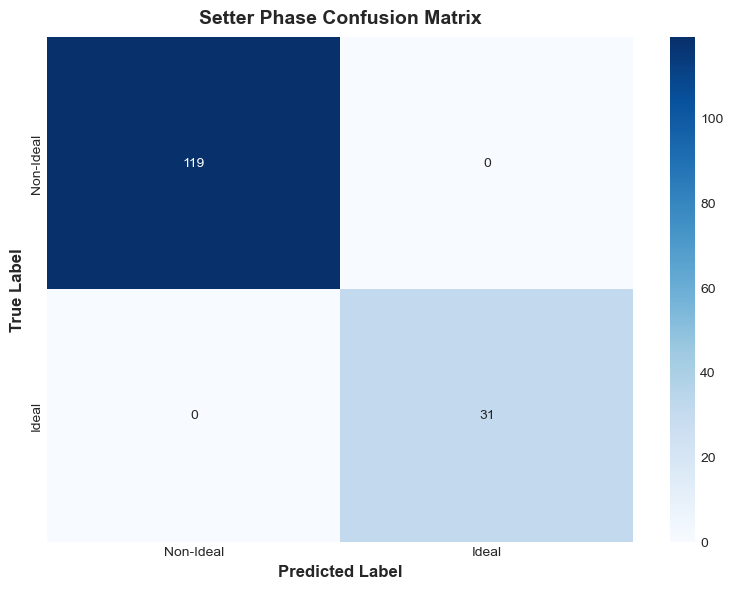

In [102]:
# --------------------------------- Setter Phase ---------------------------------
# Evaluate the model for setter phase
accuracy_setter = accuracy_score(y_setter_test, y_setter_pred)
precision_setter = precision_score(y_setter_test, y_setter_pred, pos_label='Ideal')
recall_setter = recall_score(y_setter_test, y_setter_pred, pos_label='Ideal')
f1_setter = f1_score(y_setter_test, y_setter_pred, pos_label='Ideal')
conf_matrix_setter = confusion_matrix(y_setter_test, y_setter_pred)
report_setter = classification_report(y_setter_test, y_setter_pred)

print("Setter Phase Model Evaluation")
print(f'Accuracy: {accuracy_setter:.2f}')
print(f'Precision: {precision_setter:.2f}')
print(f'Recall: {recall_setter:.2f}')
print(f'F1 Score: {f1_setter:.2f}')
print('Confusion Matrix:')
print(conf_matrix_setter)
print('Classification Report:')
print(report_setter)

# Calculate Ein for setter phase
accuracy_setter_train = accuracy_score(y_setter_train, y_setter_train_pred)
Ein_setter = 1 - accuracy_setter_train

# Calculate Eout for setter phase
Eout_setter = 1 - accuracy_setter

# Difference between Ein and Eout for setter phase
diff_setter = abs(Ein_setter - Eout_setter)

print("Setter Phase Errors")
print(f'Ein (In-sample error): {Ein_setter:.2f}')
print(f'Eout (Out-of-sample error): {Eout_setter:.2f}')
print(f'Difference: {diff_setter:.2f}')

# Create a heatmap for setter phase confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_setter, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Ideal', 'Ideal'], yticklabels=['Non-Ideal', 'Ideal'])
plt.title('Setter Phase Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Hatcher Phase Model Evaluation
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[25  0]
 [ 0  5]]
Classification Report:
              precision    recall  f1-score   support

       Ideal       1.00      1.00      1.00        25
   Non-Ideal       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Hatcher Phase Errors
Ein (In-sample error): 0.00
Eout (Out-of-sample error): 0.00
Difference: 0.00


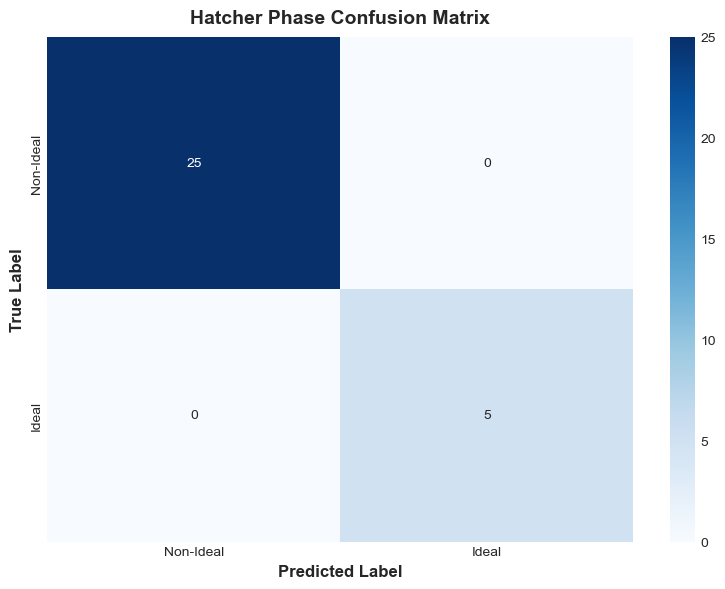

In [103]:
# --------------------------------- Hatcher Phase ---------------------------------
# Evaluate the model for hatcher phase
accuracy_hatcher = accuracy_score(y_hatcher_test, y_hatcher_pred)
precision_hatcher = precision_score(y_hatcher_test, y_hatcher_pred, pos_label='Ideal')
recall_hatcher = recall_score(y_hatcher_test, y_hatcher_pred, pos_label='Ideal')
f1_hatcher = f1_score(y_hatcher_test, y_hatcher_pred, pos_label='Ideal')
conf_matrix_hatcher = confusion_matrix(y_hatcher_test, y_hatcher_pred)
report_hatcher = classification_report(y_hatcher_test, y_hatcher_pred)

print("Hatcher Phase Model Evaluation")
print(f'Accuracy: {accuracy_hatcher:.2f}')
print(f'Precision: {precision_hatcher:.2f}')
print(f'Recall: {recall_hatcher:.2f}')
print(f'F1 Score: {f1_hatcher:.2f}')
print('Confusion Matrix:')
print(conf_matrix_hatcher)
print('Classification Report:')
print(report_hatcher)

# Calculate Ein for hatcher phase
accuracy_hatcher_train = accuracy_score(y_hatcher_train, y_hatcher_train_pred)
Ein_hatcher = 1 - accuracy_hatcher_train

# Calculate Eout for hatcher phase
Eout_hatcher = 1 - accuracy_hatcher

# Difference between Ein and Eout for hatcher phase
diff_hatcher = abs(Ein_hatcher - Eout_hatcher)

print("Hatcher Phase Errors")
print(f'Ein (In-sample error): {Ein_hatcher:.2f}')
print(f'Eout (Out-of-sample error): {Eout_hatcher:.2f}')
print(f'Difference: {diff_hatcher:.2f}')

# Create a heatmap for hatcher phase confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_hatcher, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Ideal', 'Ideal'], yticklabels=['Non-Ideal', 'Ideal'])
plt.title('Hatcher Phase Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SVM

## Train Model

In [104]:
# --------------------------------- Setter Phase ---------------------------------
# Initialize the SVM Model for Setter Phase
svm_model_setter = SVC(kernel='linear', random_state=42)

# Train SVM model for Setter Phase
svm_model_setter.fit(X_setter_train, y_setter_train)

SVC(kernel='linear', random_state=42)

In [105]:
# --------------------------------- Hatcher Phase ---------------------------------
# Initialize the SVM Model for Hatcher Phase
svm_model_hatcher = SVC(kernel='linear', random_state=42)

# Train SVM model for Hatcher Phase
svm_model_hatcher.fit(X_hatcher_train, y_hatcher_train)

SVC(kernel='linear', random_state=42)

## Predict Label

In [106]:
# --------------------------------- Setter Phase ---------------------------------
# Predict for Setter Phase
y_setter_pred_train = svm_model_setter.predict(X_setter_train)
y_setter_pred_test = svm_model_setter.predict(X_setter_test)

In [107]:
# --------------------------------- Hatcher Phase ---------------------------------
# Predict for Hatcher Phase
y_hatcher_pred_train = svm_model_hatcher.predict(X_hatcher_train)
y_hatcher_pred_test = svm_model_hatcher.predict(X_hatcher_test)

## Evaluate Model

Setter Phase Model Evaluation
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix (Setter):
[[119   0]
 [  0  31]]
Classification Report:
              precision    recall  f1-score   support

       Ideal       1.00      1.00      1.00       119
   Non-Ideal       1.00      1.00      1.00        31

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Setter Phase Errors
Ein (In-sample error): 0.00
Eout (Out-of-sample error): 0.00
Difference: 0.00


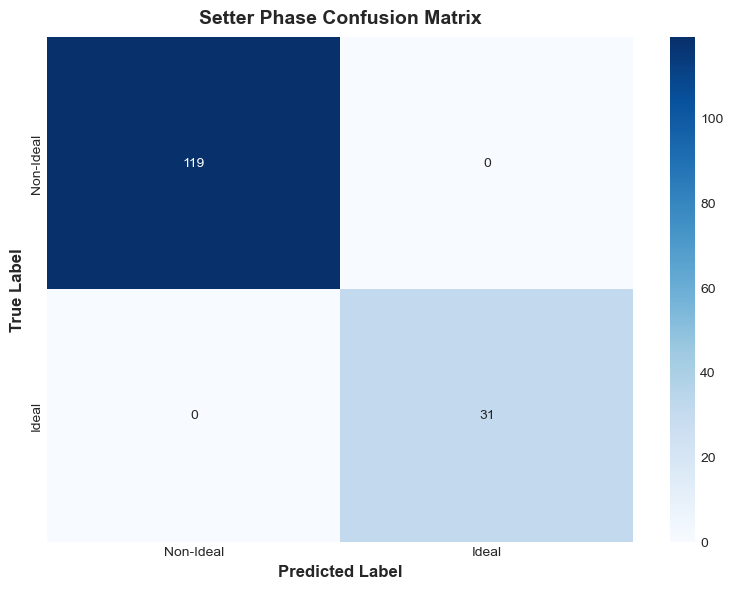

In [108]:
# --------------------------------- Setter Phase ---------------------------------
# Evaluate Setter Phase
accuracy_setter_svm = accuracy_score(y_setter_test, y_setter_pred_test)
precision_setter_svm = precision_score(y_setter_test, y_setter_pred_test, pos_label='Ideal')
recall_setter_svm = recall_score(y_setter_test, y_setter_pred_test, pos_label='Ideal')
f1_setter_svm = f1_score(y_setter_test, y_setter_pred_test, pos_label='Ideal')
conf_matrix_setter_svm = confusion_matrix(y_setter_test, y_setter_pred_test)
report_setter_svm = classification_report(y_setter_test, y_setter_pred_test)

print("Setter Phase Model Evaluation")
print(f'Accuracy: {accuracy_setter_svm:.2f}')
print(f'Precision: {precision_setter_svm:.2f}')
print(f'Recall: {recall_setter_svm:.2f}')
print(f'F1 Score: {f1_setter_svm:.2f}')
print("Confusion Matrix (Setter):")
print(conf_matrix_setter_svm)
print('Classification Report:')
print(report_setter_svm)

# In-sample error (Ein)
accuracy_setter_train_svm = accuracy_score(y_setter_train, y_setter_pred_train)
ein_setter_svm = 1 - accuracy_setter_train_svm

# Out-of-sample error (Eout)
eout_setter_svm = 1 - accuracy_setter_svm

# Difference between Ein and Eout
diff_setter_svm = ein_setter_svm - eout_setter_svm

print("Setter Phase Errors")
print(f'Ein (In-sample error): {ein_setter_svm:.2f}')
print(f'Eout (Out-of-sample error): {eout_setter_svm:.2f}')
print(f'Difference: {diff_setter_svm:.2f}')

# Create a heatmap for setter phase confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_setter_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Ideal', 'Ideal'], yticklabels=['Non-Ideal', 'Ideal'])
plt.title('Setter Phase Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Hatcher Phase Model Evaluation
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix (Hatcher):
[[25  0]
 [ 0  5]]
Classification Report:
              precision    recall  f1-score   support

       Ideal       1.00      1.00      1.00        25
   Non-Ideal       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Hatcher Phase Errors
Ein (In-sample error): 0.00
Eout (Out-of-sample error): 0.00
Difference: 0.00


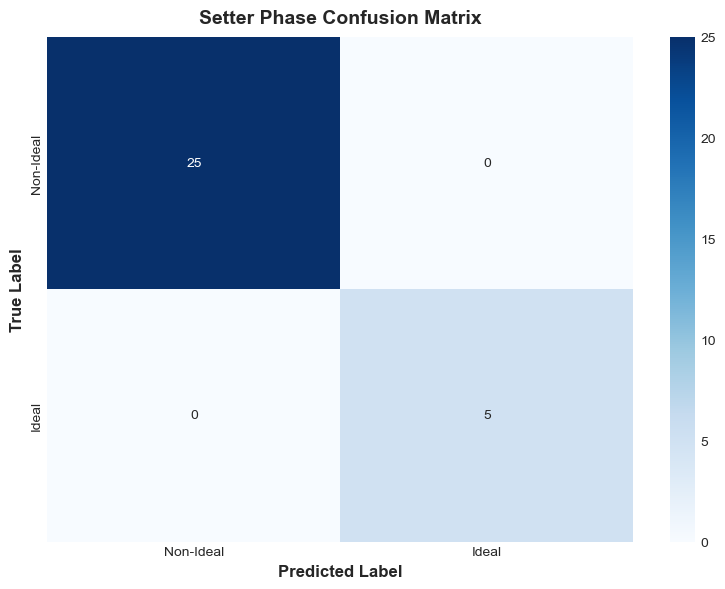

In [109]:
# --------------------------------- Hatcher Phase ---------------------------------
# Evaluate Hatcher Phase
accuracy_hatcher_svm = accuracy_score(y_hatcher_test, y_hatcher_pred_test)
precision_hatcher_svm = precision_score(y_hatcher_test, y_hatcher_pred_test, pos_label='Ideal')
recall_hatcher_svm = recall_score(y_hatcher_test, y_hatcher_pred_test, pos_label='Ideal')
f1_hatcher_svm = f1_score(y_hatcher_test, y_hatcher_pred_test, pos_label='Ideal')
conf_matrix_hatcher_svm = confusion_matrix(y_hatcher_test, y_hatcher_pred_test)
report_hatcher_svm = classification_report(y_hatcher_test, y_hatcher_pred_test)

print("Hatcher Phase Model Evaluation")
print(f'Accuracy: {accuracy_hatcher_svm:.2f}')
print(f'Precision: {precision_hatcher_svm:.2f}')
print(f'Recall: {recall_hatcher_svm:.2f}')
print(f'F1 Score: {f1_hatcher_svm:.2f}')
print("Confusion Matrix (Hatcher):")
print(conf_matrix_hatcher_svm)
print('Classification Report:')
print(report_hatcher_svm)

# In-sample error (Ein)
accuracy_hatcher_train_svm = accuracy_score(y_hatcher_train, y_hatcher_pred_train)
ein_hatcher_svm = 1 - accuracy_hatcher_train_svm

# Out-of-sample error (Eout)
eout_hatcher_svm = 1 - accuracy_hatcher_svm

# Difference between Ein and Eout
diff_hatcher_svm = ein_hatcher_svm - eout_hatcher_svm

print("Hatcher Phase Errors")
print(f'Ein (In-sample error): {ein_hatcher_svm:.2f}')
print(f'Eout (Out-of-sample error): {eout_hatcher_svm:.2f}')
print(f'Difference: {diff_hatcher_svm:.2f}')

# Create a heatmap for setter phase confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_hatcher_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Ideal', 'Ideal'], yticklabels=['Non-Ideal', 'Ideal'])
plt.title('Setter Phase Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predict Sensor Data Condition

## Load Dataset

In [134]:
# Load the datasets
sensor_data_setter_df = pd.read_csv(dataset_dir / 'sensor_data_setter.csv')

# Print the dataset
print(f"Sensor Data Setter ({sensor_data_setter_df.shape[0]} rows, {sensor_data_setter_df.shape[1]} columns):")
print(sensor_data_setter_df)

Sensor Data Setter (74 rows, 2 columns):
    Temperature  Humidity
0         29.46     42.82
1         29.50     42.66
2         29.50     42.38
3         29.53     42.20
4         29.56     41.97
..          ...       ...
69        29.68     41.68
70        29.68     41.69
71        29.68     41.76
72        29.68     41.84
73        29.69     41.90

[74 rows x 2 columns]


## Prediction

In [135]:
# Predict labels for the sensor_data_setter with Logistic Regression Model
y_sensor_data_setter_pred_log = logistic_model_setter.predict(sensor_data_setter_df)

# Predict labels for the sensor_data_setter with SVM model
y_sensor_data_setter_pred_svm = svm_model_setter.predict(sensor_data_setter_df)

## Generate Result Dataframe

In [136]:
# generate sensor data output dataframe for Logistic Regression Model
sensor_data_setter_output_log_df = pd.concat([sensor_data_setter_df, pd.DataFrame({'Condition': y_sensor_data_setter_pred_log})], axis=1)

# generate sensor data output dataframe for SVM Model
sensor_data_setter_output_svm_df = pd.concat([sensor_data_setter_df, pd.DataFrame({'Condition': y_sensor_data_setter_pred_svm})], axis=1)

# show dataframe
print(f'sensor_data_setter_output_log_df: \n{sensor_data_setter_output_log_df}')
print(f'sensor_data_setter_output_svm_df: \n{sensor_data_setter_output_svm_df}')


sensor_data_setter_output_log_df: 
    Temperature  Humidity  Condition
0         29.46     42.82  Non-Ideal
1         29.50     42.66  Non-Ideal
2         29.50     42.38  Non-Ideal
3         29.53     42.20  Non-Ideal
4         29.56     41.97  Non-Ideal
..          ...       ...        ...
69        29.68     41.68  Non-Ideal
70        29.68     41.69  Non-Ideal
71        29.68     41.76  Non-Ideal
72        29.68     41.84  Non-Ideal
73        29.69     41.90  Non-Ideal

[74 rows x 3 columns]
sensor_data_setter_output_svm_df: 
    Temperature  Humidity  Condition
0         29.46     42.82  Non-Ideal
1         29.50     42.66  Non-Ideal
2         29.50     42.38  Non-Ideal
3         29.53     42.20  Non-Ideal
4         29.56     41.97  Non-Ideal
..          ...       ...        ...
69        29.68     41.68  Non-Ideal
70        29.68     41.69  Non-Ideal
71        29.68     41.76  Non-Ideal
72        29.68     41.84  Non-Ideal
73        29.69     41.90  Non-Ideal

[74 rows x 3 colum

## Save Result to CSV file

In [137]:
# Get the current date and time
now = datetime.now()

# Format the date and time as yyyymmddtime
formatted_date_time = now.strftime("%Y%m%d%H%M%S")

# Count the number of prediction rows
row_count_pred = sensor_data_setter_df.shape[0]

# define filename for CSV file
filenames_pred_log = output_dir / (f'sensor_data_setter_output_log_{formatted_date_time}_{row_count_pred}.csv')
filenames_pred_svm = output_dir / (f'sensor_data_setter_output_svm_{formatted_date_time}_{row_count_pred}.csv')

try:
    # Save the DataFrame to a CSV file
    sensor_data_setter_output_log_df.to_csv(filenames_pred_log, index=False)
    sensor_data_setter_output_svm_df.to_csv(filenames_pred_svm, index=False)
    print(f"Prediction was successfully saved!")
    print(f"sensor_data_setter_output_log_df: {filenames_pred_log}")
    print(f"sensor_data_setter_output_svm_df: {filenames_pred_svm}")      
          
except Exception as e:
    print(f"Failed to save predictions: {e}")

Prediction was successfully saved!
sensor_data_setter_output_log_df: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml/output/sensor_data_setter_output_log_20240819194642_74.csv
sensor_data_setter_output_svm_df: /Users/nofrialhadi/nordic/thingy53/egg_hatch/ml/output/sensor_data_setter_output_svm_20240819194642_74.csv
